In [2]:
%load_ext autoreload
%autoreload 2
import sys

sys.path.append('/home/azhar04/project/1. dev/quantum-dev/ShotOptimized-ADAPT-VQE/')
print(sys.executable)

import json
from visualization.visualize import plotErrorToAdaptIterations, plotErrorToAdaptAndOptimizerIterations, plotErrorToCumulativeShots

import numpy as np
import json
import matplotlib.pyplot as plt


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/home/azhar04/anaconda3/envs/qiskit-1-2/bin/python


In [3]:
filename = '../data/data_LiH_N=9216_k=100_Nexp=1000_T=050225_012526.json'

with open(filename, 'r') as json_file:
    data_1 = json.load(json_file)

filename = '../data/data_LiH_N=9216_k=100_Nexp=1000_T=040225_211515.json'

with open(filename, 'r') as json_file:
    data_2 = json.load(json_file)

In [21]:
data_1['data_list'][0]

{'energies_statevector': [-7.8625676],
 'energies_uniform': [-7.862601176199806],
 'energies_vmsa': [-7.8625989650886705],
 'energies_vpsr': [-7.862596925951796],
 'std_uniform': [0.0007911988211781198],
 'std_vmsa': [0.0006604554978289125],
 'std_vpsr': [0.0008315674451643504],
 'shots_uniform': [[1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024, 1024]],
 'shots_vmsa': [[388, 398, 448, 435, 1761, 1761, 1572, 1553, 1]],
 'shots_vpsr': [[254, 262, 282, 302, 1140, 1145, 1027, 1028, 1]]}

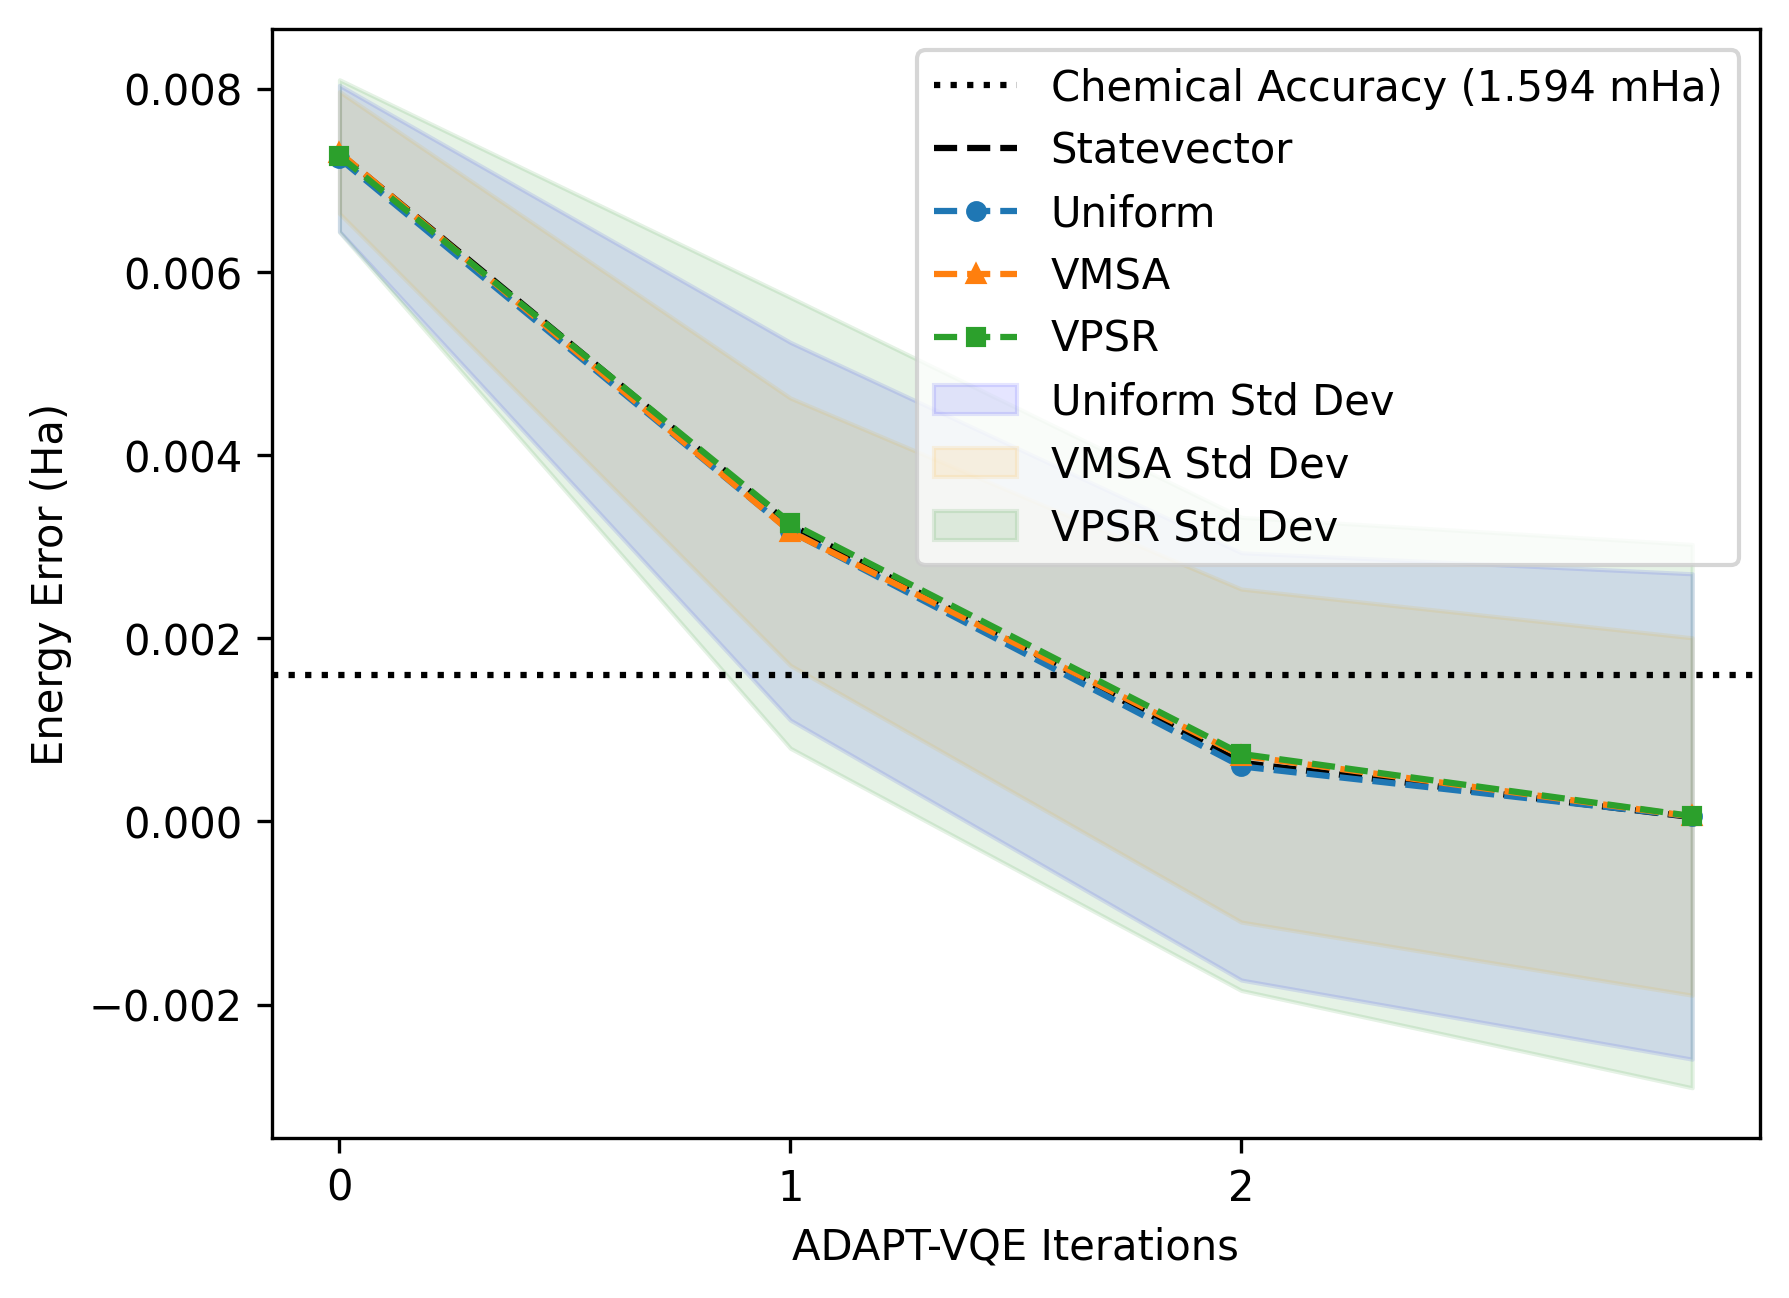

In [12]:

plt.figure()
plt.rcParams['figure.dpi'] = 300
exact_energy = data_1['fci_energy']

energies_statevector = []
energies_uniform = []
energies_vmsa = []
energies_vpsr = []

std_uniform = []
std_vmsa = []
std_vpsr = []

for i in range(len(data_2['data_list'])):
    energies_statevector.append(data_2['data_list'][i]['energies_statevector'][-1])
    energies_uniform.append(data_2['data_list'][i]['energies_uniform'][-1])
    energies_vmsa.append(data_2['data_list'][i]['energies_vmsa'][-1])
    
    std_uniform.append(data_2['data_list'][i]['std_uniform'][-1])
    std_vmsa.append(data_2['data_list'][i]['std_vmsa'][-1])

for i in range(len(data_1['data_list'])):
    energies_vpsr.append(data_1['data_list'][i]['energies_vpsr'][-1])
    std_vpsr.append(data_1['data_list'][i]['std_vpsr'][-1])


error_statevector = np.abs(np.array(energies_statevector) - exact_energy)
error_uniform = np.abs(np.array(energies_uniform) - exact_energy)
error_vmsa = np.abs(np.array(energies_vmsa) - exact_energy)
error_vpsr = np.abs(np.array(energies_vpsr) - exact_energy)

x = range(len(error_statevector))

plt.axhline(1.594e-3, color='black', linestyle='dotted', label='Chemical Accuracy (1.594 mHa)')

plt.plot(x, error_statevector, label='Statevector', linestyle='--', color='black')
plt.plot(x, error_uniform, label='Uniform', linestyle='--', marker='o', markersize=4)
plt.plot(x, error_vmsa, label='VMSA', linestyle='--', marker='^', markersize=4)
plt.plot(x, error_vpsr, label='VPSR', linestyle='--', marker='s', markersize=4)

plt.fill_between(x, error_uniform - std_uniform, error_uniform + std_uniform, color='blue', alpha=0.1, label='Uniform Std Dev')
plt.fill_between(x, error_vmsa - std_vmsa, error_vmsa + std_vmsa, color='orange', alpha=0.1, label='VMSA Std Dev')
plt.fill_between(x, error_vpsr - std_vpsr, error_vpsr + std_vpsr, color='green', alpha=0.1, label='VPSR Std Dev')

# plt.yscale('symlog', linthresh=1e-5)
# plt.yscale('log')
# plt.ylim(0.1,1)
plt.ylabel("Energy Error (Ha)")
plt.xlabel("ADAPT-VQE Iterations")
plt.xticks([0,1,2])
plt.legend()

[  9216.  92160. 165888. 258048.]


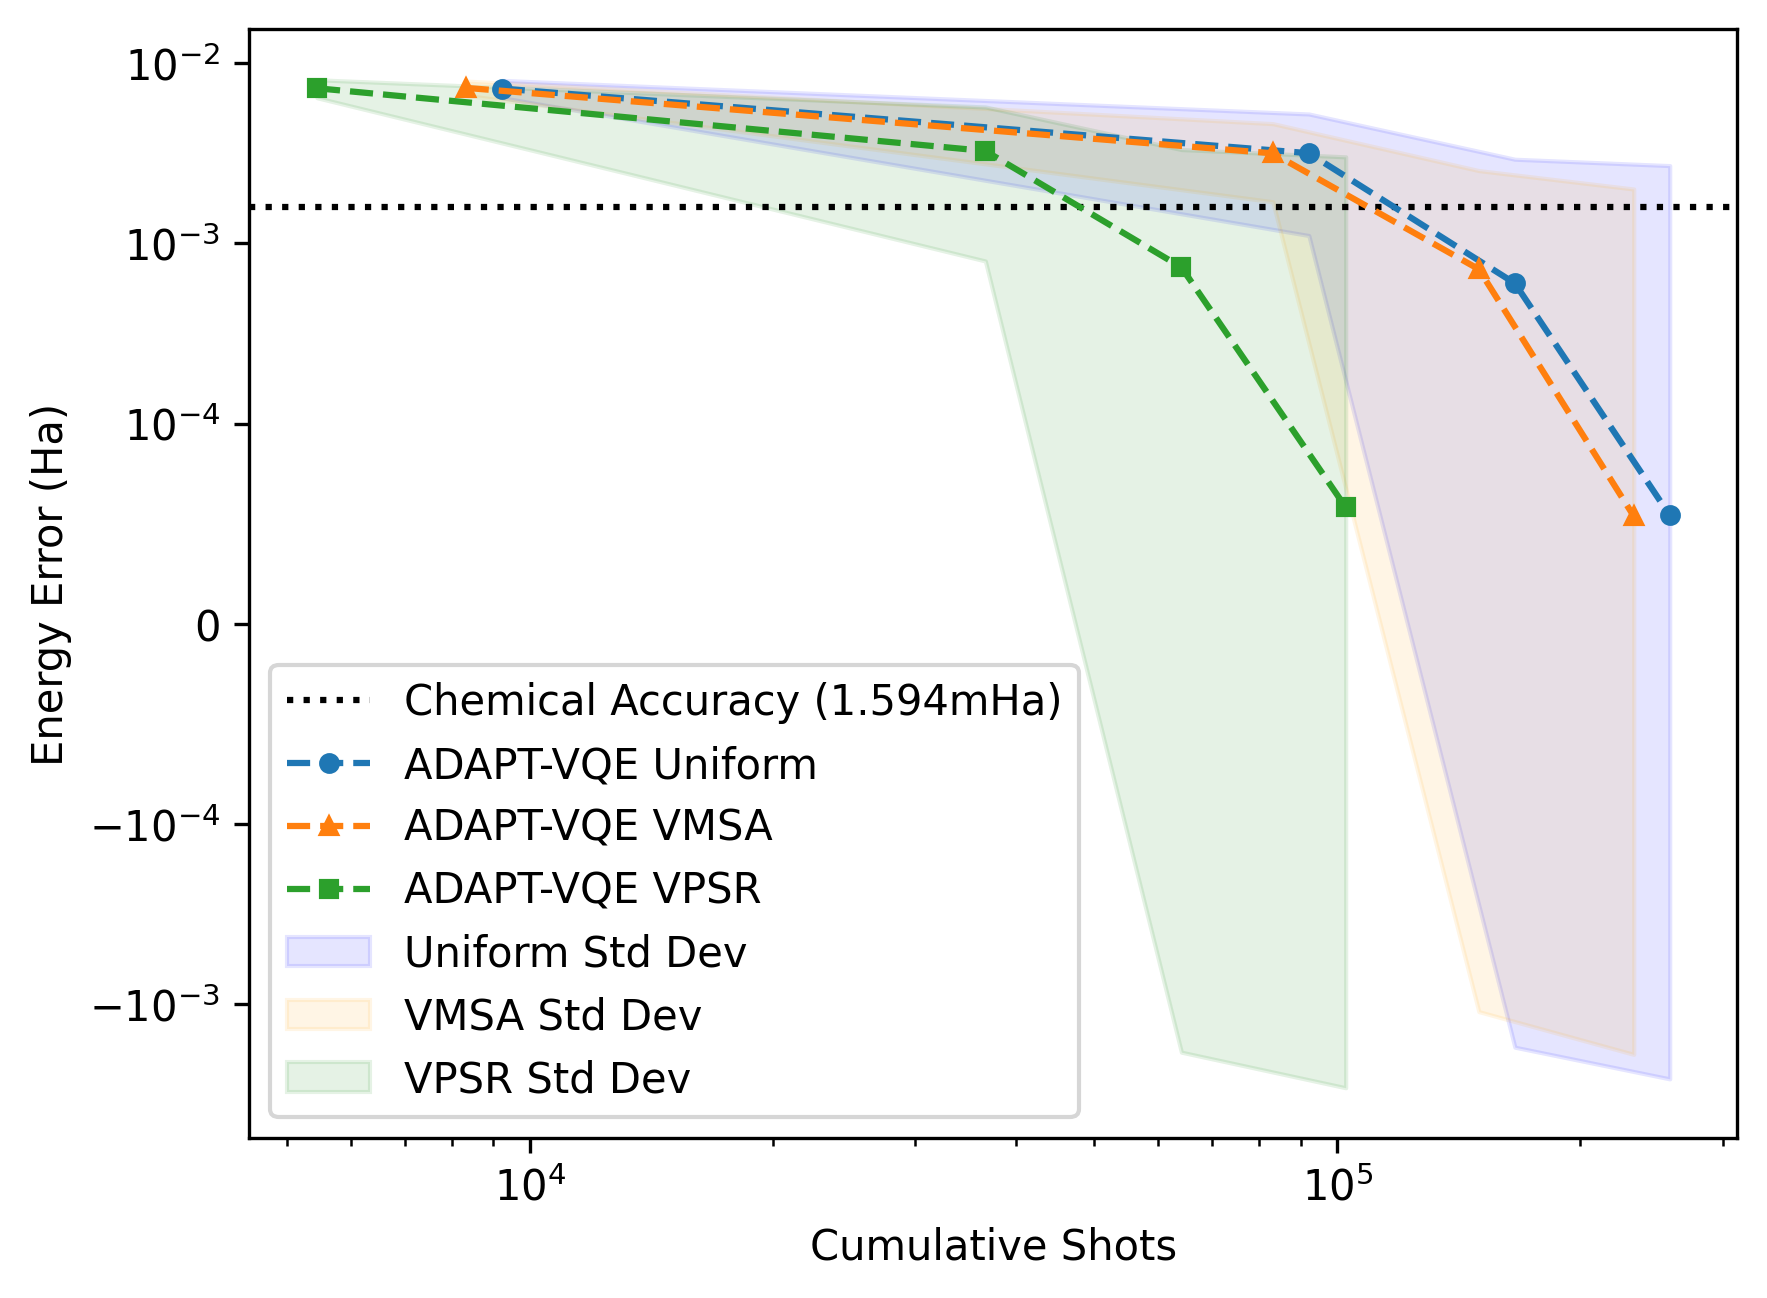

In [15]:
plt.figure()
plt.rcParams['figure.dpi'] = 300
exact_energy = data_2['fci_energy']

from itertools import accumulate

shots_uniform = []
shots_vmsa = []
shots_vpsr = []

shots_uniform = [ [ np.sum(sublist) for sublist in data_2['data_list'][i]['shots_uniform'] ] for i in range(len(data_2['data_list'])) ]
shots_vmsa = [ [ np.sum(sublist) for sublist in data_2['data_list'][i]['shots_vmsa'] ] for i in range(len(data_2['data_list'])) ]
shots_vpsr = [ [ np.sum(sublist) for sublist in data_1['data_list'][i]['shots_vpsr'] ] for i in range(len(data_2['data_list'])) ]

cumulative_shots_uniform = [list(accumulate(sublist)) for sublist in shots_uniform]
cumulative_shots_vmsa = [list(accumulate(sublist)) for sublist in shots_vmsa]
cumulative_shots_vpsr = [list(accumulate(sublist)) for sublist in shots_vpsr]

shots_uniform_list = np.array([])
shots_vmsa_list = np.array([])
shots_vpsr_list = np.array([])

energies_statevector = np.array([])
energies_uniform = np.array([])
energies_vmsa = np.array([])
energies_vpsr = np.array([])

std_uniform = np.array([])
std_vmsa = np.array([])
std_vpsr = np.array([])

for i in range(len(data_2['data_list'])):
    energies_statevector = np.append(energies_statevector, np.array(data_2['data_list'][i]['energies_statevector'][-1]))
    energies_uniform = np.append(energies_uniform, np.array(data_2['data_list'][i]['energies_uniform'][-1]))
    energies_vmsa = np.append(energies_vmsa, np.array(data_2['data_list'][i]['energies_vmsa'][-1]))
    energies_vpsr = np.append(energies_vpsr, np.array(data_1['data_list'][i]['energies_vpsr'][-1]))
    
    std_uniform = np.append(std_uniform, np.array(data_2['data_list'][i]['std_uniform'][-1]))
    std_vmsa = np.append(std_vmsa, np.array(data_2['data_list'][i]['std_vmsa'][-1]))
    std_vpsr = np.append(std_vpsr, np.array(data_1['data_list'][i]['std_vpsr'][-1]))
    
    shots_uniform_list = np.append(shots_uniform_list, cumulative_shots_uniform[i][-1])
    shots_vmsa_list = np.append(shots_vmsa_list, cumulative_shots_vmsa[i][-1])
    shots_vpsr_list = np.append(shots_vpsr_list, cumulative_shots_vpsr[i][-1])

print(shots_uniform_list)

error_statevector = np.abs(np.array(energies_statevector) - exact_energy)
error_uniform = np.abs(np.array(energies_uniform) - exact_energy)
error_vmsa = np.abs(np.array(energies_vmsa) - exact_energy)
error_vpsr = np.abs(np.array(energies_vpsr) - exact_energy)

plt.axhline(1.594e-3, color='black', linestyle='dotted', label='Chemical Accuracy (1.594mHa)')

plt.plot(shots_uniform_list, error_uniform, label='ADAPT-VQE Uniform', linestyle='--', marker='o', markersize=4)
plt.plot(shots_vmsa_list, error_vmsa, label='ADAPT-VQE VMSA', linestyle='--', marker='^', markersize=4)
plt.plot(shots_vpsr_list, error_vpsr, label='ADAPT-VQE VPSR', linestyle='--', marker='s', markersize=4)

plt.fill_between(shots_uniform_list, error_uniform - std_uniform, error_uniform + std_uniform, color='blue', alpha=0.1, label='Uniform Std Dev')
plt.fill_between(shots_vmsa_list, error_vmsa - std_vmsa, error_vmsa + std_vmsa, color='orange', alpha=0.1, label='VMSA Std Dev')
plt.fill_between(shots_vpsr_list, error_vpsr - std_vpsr, error_vpsr + std_vpsr, color='green', alpha=0.1, label='VPSR Std Dev')


plt.yscale('symlog', linthresh=1e-4)
# plt.yscale('log')

plt.xscale('log')
# plt.ylim(0.001,0.1)

plt.ylabel("Energy Error (Ha)")
plt.xlabel("Cumulative Shots")
# plt.xticks([0,1,2,3,4])
plt.legend()